In [1]:
%matplotlib inline

import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332
2017-09-26,23.416000,22.726667,23.395332,23.016666,107344500.0,23.016666
2017-09-27,23.432667,22.700001,23.326668,22.731333,90904500.0,22.731333
2017-09-28,22.850000,22.360001,22.658667,22.639999,79794000.0,22.639999
2017-09-29,22.978666,22.573334,22.790667,22.740000,76606500.0,22.740000


In [3]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-09-25 to 2022-09-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [4]:
df_tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,125.244486,119.377950,122.426744,122.393062,1.318846e+08,122.393062
std,121.774708,116.014287,119.062425,118.922602,9.031926e+07,118.922602
min,12.445333,11.799333,12.073333,11.931333,2.940180e+07,11.931333
25%,21.127334,20.350667,20.811666,20.781666,7.532550e+07,20.781666
50%,50.799999,46.875332,48.666668,49.574669,1.014840e+08,49.574669
75%,238.926666,228.283333,234.224998,234.430000,1.526895e+08,234.430000
max,414.496674,405.666656,411.470001,409.970001,9.140820e+08,409.970001


### Simple Moving average:

In [5]:
df_tesla['rolling_10_days_open'] = df_tesla['Open'].rolling(window=10, min_periods=3).mean()
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,rolling_10_days_open
Date,,,,,,,
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332,NaN
2017-09-26,23.416000,22.726667,23.395332,23.016666,107344500.0,23.016666,NaN
2017-09-27,23.432667,22.700001,23.326668,22.731333,90904500.0,22.731333,23.421778
2017-09-28,22.850000,22.360001,22.658667,22.639999,79794000.0,22.639999,23.231000
2017-09-29,22.978666,22.573334,22.790667,22.740000,76606500.0,22.740000,23.142933


<AxesSubplot:xlabel='Date'>

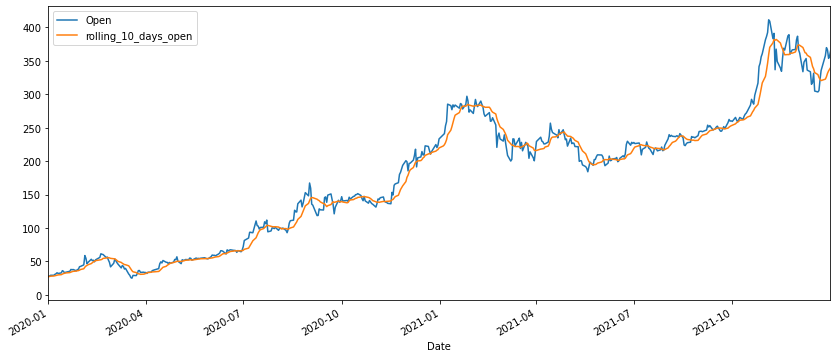

In [6]:
df_tesla[['Open', 'rolling_10_days_open']].plot(figsize = (14,6), xlim=['2020-01-01', '2021-12-31'])

In [7]:
df_tesla['rolling_20_days_open'] = df_tesla['Open'].rolling(window=20, min_periods=1).mean()
df_tesla['rolling_30_days_open'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()

In [8]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,rolling_10_days_open,rolling_20_days_open,rolling_30_days_open
Date,,,,,,,,,
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332,NaN,23.543333,23.543333
2017-09-26,23.416000,22.726667,23.395332,23.016666,107344500.0,23.016666,NaN,23.469333,23.469333
2017-09-27,23.432667,22.700001,23.326668,22.731333,90904500.0,22.731333,23.421778,23.421778,23.421778
2017-09-28,22.850000,22.360001,22.658667,22.639999,79794000.0,22.639999,23.231000,23.231000,23.231000
2017-09-29,22.978666,22.573334,22.790667,22.740000,76606500.0,22.740000,23.142933,23.142933,23.142933


<AxesSubplot:xlabel='Date'>

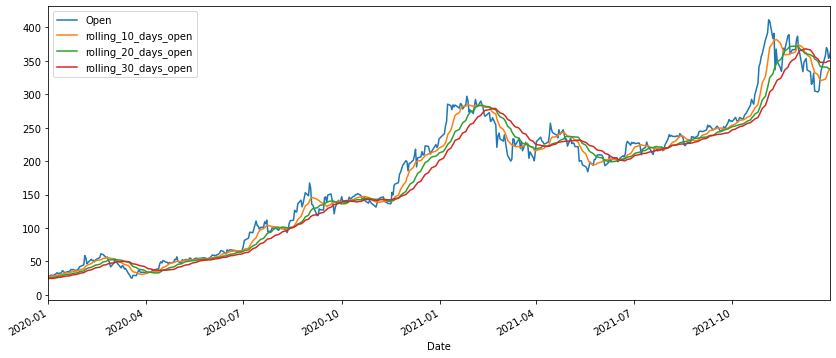

In [9]:
df_tesla[['Open','rolling_10_days_open','rolling_20_days_open', 'rolling_30_days_open']].plot(figsize = (14,6), xlim=['2020-01-01', '2021-12-31'])

#### disadvantages of simple moving average:

__always giving equal importance to all data within the windows

### Cummulative moving average: Expending

https://en.m.wikiversity.org/wiki/Moving_Average/Cumulative_Moving_Average

<AxesSubplot:xlabel='Date'>

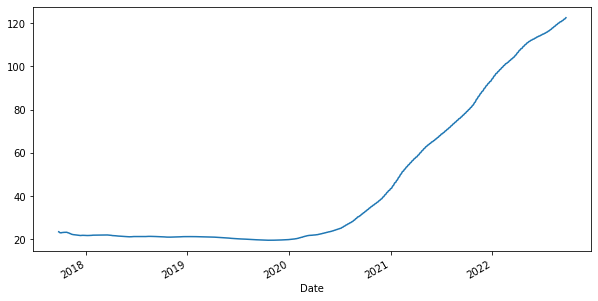

In [10]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

#### Exponential Weighted moving average
 https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/exponentially-weighted-moving-average-ewma/
 
 EWMA = alpha\*r_t +(1-alpha)*EWMA_t-1
 
 #### exponential moving average
 ((x-pre_EMA)*multiplier)+pre_EMA
 
 here pre_EMA = previous window EMA AND multiplier = 2/(N+1) where n = window size

Where:

Alpha = The weight decided by the user

r = Value of the series in the current period

The EWMA is a recursive function, which means that the current observation is calculated using the previous observation. The EWMA’s recursive property leads to the exponentially decaying weights as shown below:

#### Applications of the EWMA
Technical Analysis

The EWMA is widely used in technical analysis. It may not be used directly, but it is used in conjunction with other indicators to generate trading signals. A well-known example is the Negative Volume Index (NVI), which is used in conjunction with its EWMA. A buy signal is generated when the NVI crosses above its 250-day EWMA.

The EWMA can also be used in a simple crossover strategy, where a buy signal is generated when the price crosses the EWMA from above, and a sell signal is generated when the price crosses the EWMA from below.

Another application of the EWMA in technical analysis is that it can be used as support or resistance levels. For this purpose, it is better to use longer moving averages, usually longer than a 20-day moving average.

### EMA : Exponential Moving Average

In [11]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

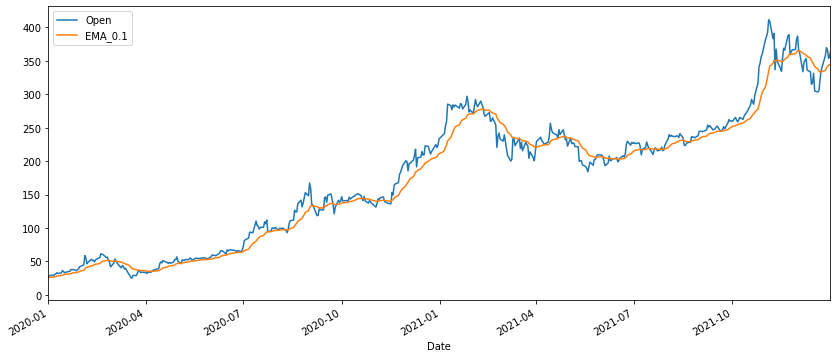

In [12]:
df_tesla[['Open','EMA_0.1']].plot(figsize = (14,6), xlim=['2020-01-01', '2021-12-31'])

In [13]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

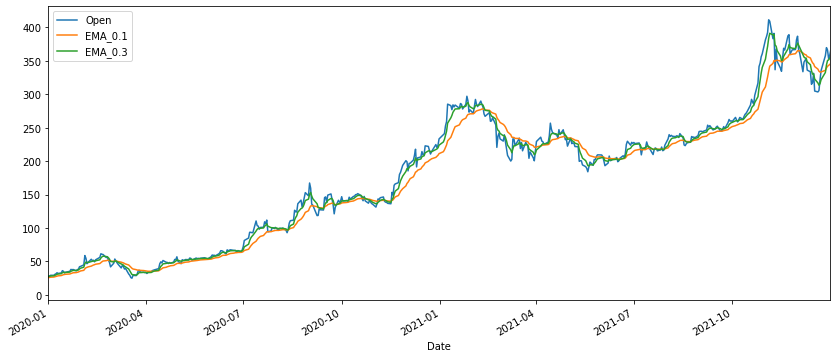

In [14]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(figsize = (14,6), xlim=['2020-01-01', '2021-12-31'])

In [15]:
# exponential weighted moving average

df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span = 5, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

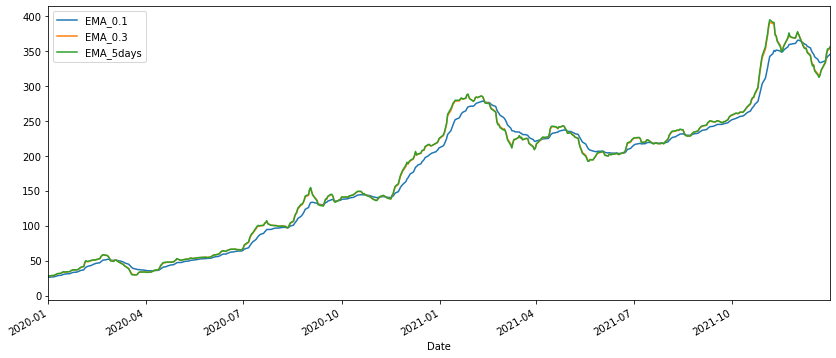

In [18]:
df_tesla[['EMA_0.1','EMA_0.3','EMA_5days']].plot(figsize = (14,6), xlim=['2020-01-01', '2021-12-31'])